# Assignment-1 Report: Wine Classification using Linear Discriminant Analysis

## Introduction

The objective of this assignment is to classify wine samples into three distinct classes using their chemical properties. For this purpose, the Linear Discriminant Analysis (LDA) algorithm has been selected.

## Why LDA?

Linear Discriminant Analysis (LDA) is a supervised learning technique used for both dimensionality reduction and classification. LDA works by finding a linear combination of features that maximizes the separation between multiple classes. It is especially effective when:

- The features are continuous variables.
- The classes are well-separated.
- The goal is to find clear linear boundaries between classes.

Given that the wine dataset contains continuous features and three target classes, LDA is a suitable choice for this classification task.

## Summary

By applying LDA to the wine dataset, we aim to achieve high classification accuracy and gain insights into the most discriminative features for wine class separation.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('src/Wine.csv')

df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
columns_new = ["Class","Alcohol","MalicAcid","Ash","AlcalinityOfAsh","Magnesium","TotalPhenols","Flavanoids","NonflavanoidPhenols","Proanthocyanins","ColorIntensity","Hue","OD280/OD315ofDilutedWines","Proline"]   
df.columns = columns_new

df.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315ofDilutedWines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df.describe()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315ofDilutedWines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Class                      177 non-null    int64  
 1   Alcohol                    177 non-null    float64
 2   MalicAcid                  177 non-null    float64
 3   Ash                        177 non-null    float64
 4   AlcalinityOfAsh            177 non-null    float64
 5   Magnesium                  177 non-null    int64  
 6   TotalPhenols               177 non-null    float64
 7   Flavanoids                 177 non-null    float64
 8   NonflavanoidPhenols        177 non-null    float64
 9   Proanthocyanins            177 non-null    float64
 10  ColorIntensity             177 non-null    float64
 11  Hue                        177 non-null    float64
 12  OD280/OD315ofDilutedWines  177 non-null    float64
 13  Proline                    177 non-null    int64  

In [6]:
df.groupby("Class").size()

Class
1    58
2    71
3    48
dtype: int64

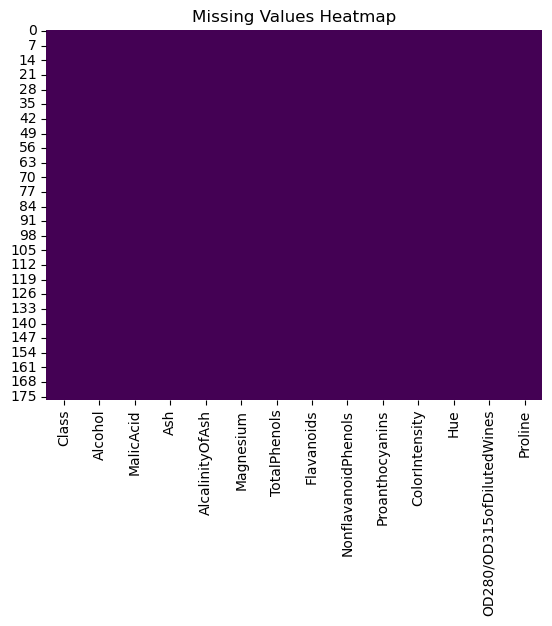

In [7]:

# Missing Values Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


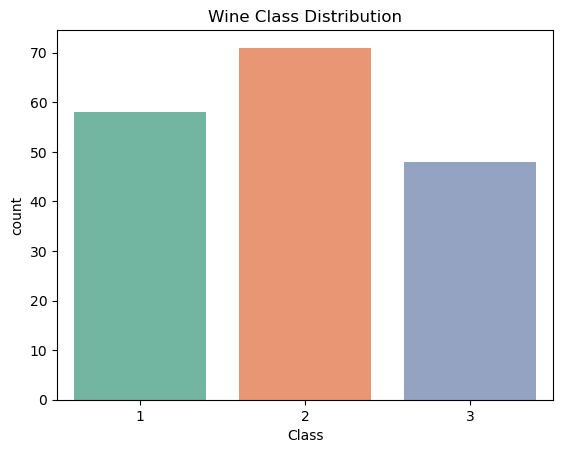

In [8]:

# Class Distribution
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Wine Class Distribution")
plt.show()


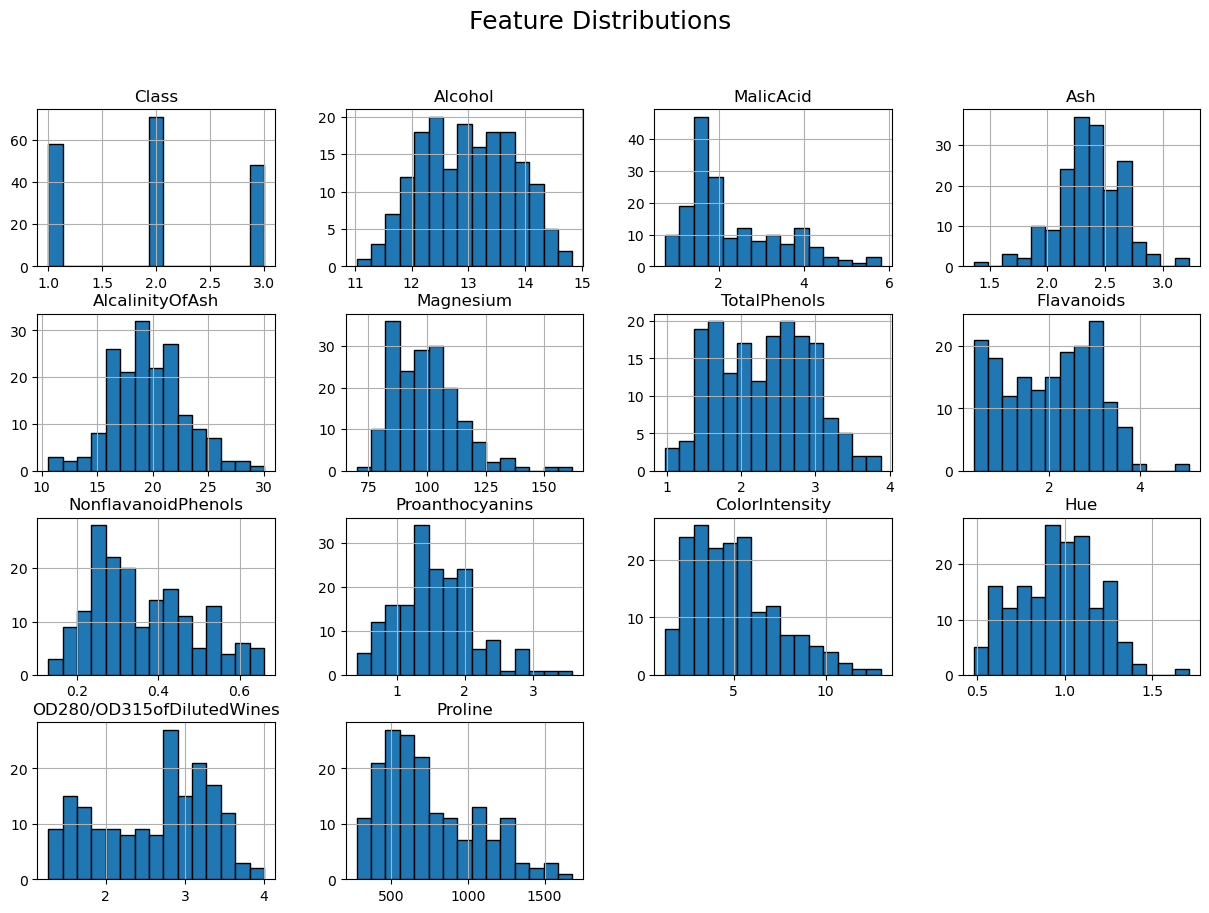

In [9]:

# Feature Distributions (Histograms)
df.hist(bins=15, figsize=(15,10), edgecolor="black")
plt.suptitle("Feature Distributions", size=18)
plt.show()


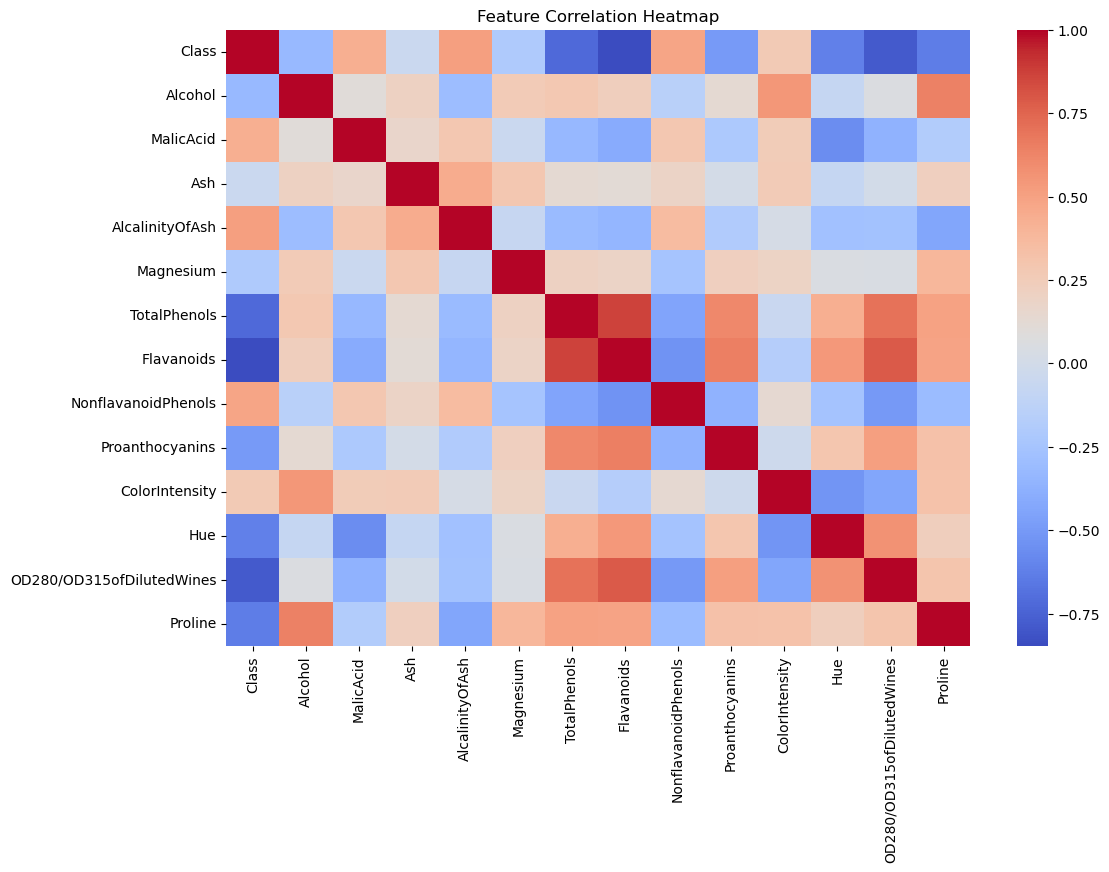

In [10]:

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


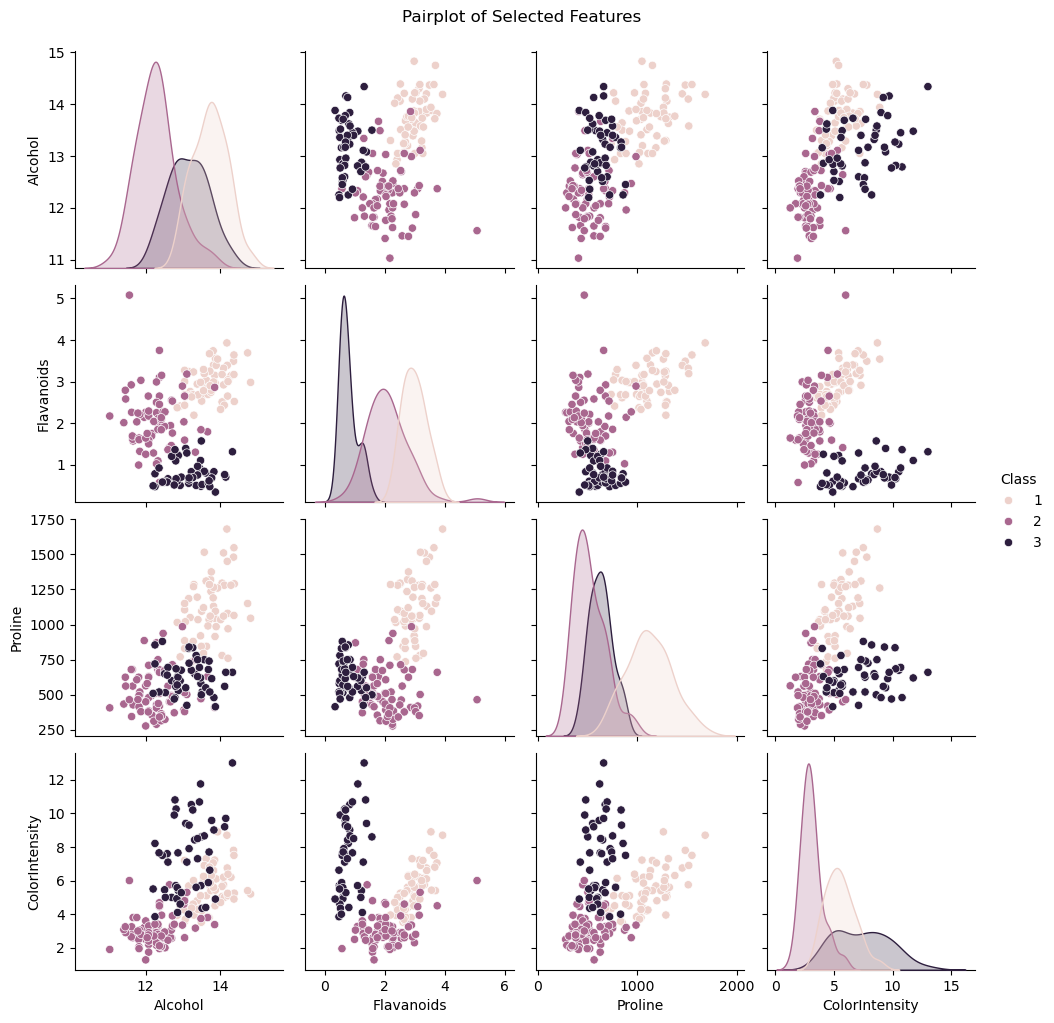

In [11]:

# Pairplot of Selected Features
sns.pairplot(df, hue="Class", vars=["Alcohol","Flavanoids","Proline","ColorIntensity"])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


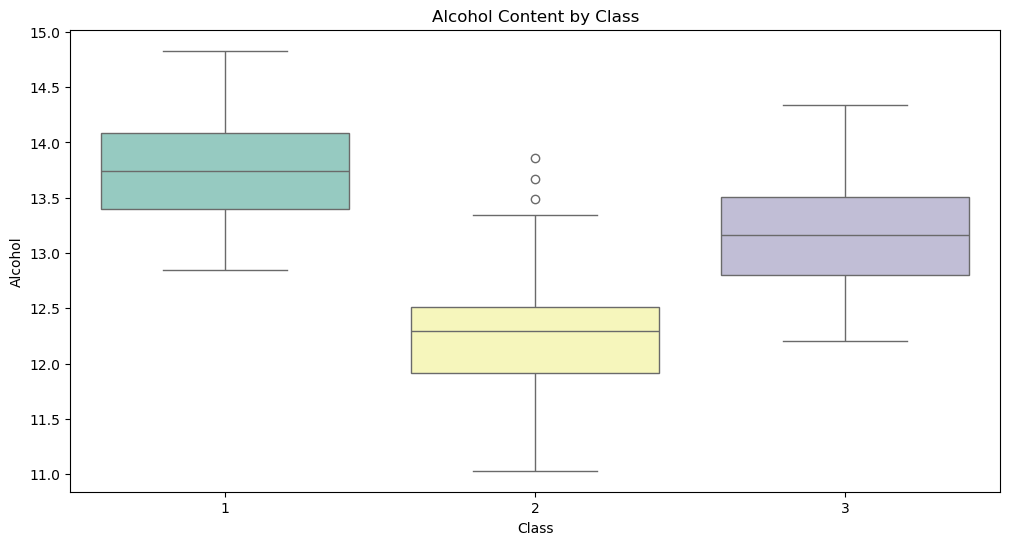

In [12]:

# Boxplot Example: Alcohol by Class
plt.figure(figsize=(12,6))
sns.boxplot(x="Class", y="Alcohol", data=df, palette="Set3")
plt.title("Alcohol Content by Class")
plt.show()


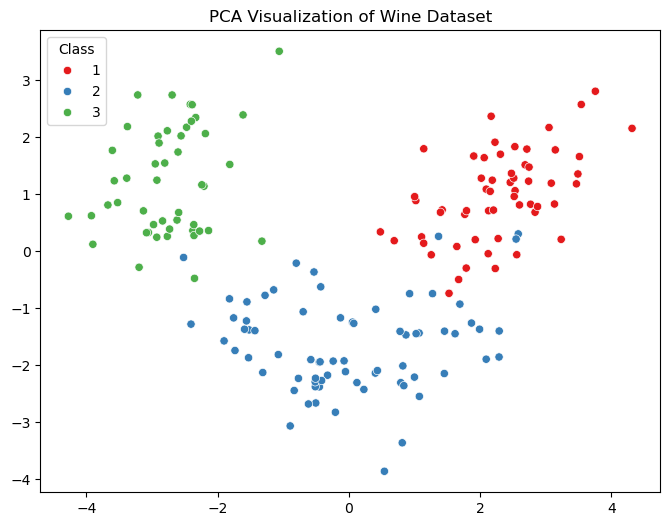

In [13]:

# PCA 2D Visualization before LDA
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(df.drop("Class", axis=1))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df["Class"], palette="Set1")
plt.title("PCA Visualization of Wine Dataset")
plt.show()


In [14]:
# Split the data into training (70%) and testing (30%) sets
X = df.drop(["Class"],axis=1)
y = df["Class"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Use StandardScaler for LDA, as it performs better with standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape: ",X_train_scaled.shape)
print("X_test shape: ",X_test_scaled.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (123, 13)
X_test shape:  (54, 13)
y_train shape:  (123,)
y_test shape:  (54,)


In [15]:
X_train.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315ofDilutedWines,Proline
22,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015
108,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
144,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472


In [16]:
X_test.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315ofDilutedWines,Proline
54,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
150,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
63,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
55,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
123,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380


In [17]:
def lda_model(train_data,label_data,test_data,label_test):
    # Initialize and train the LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(train_data, label_data)
    
    # Make predictions on test and training data
    y_predict = lda.predict(test_data)
    y_pred_train = lda.predict(train_data)
    
    # Print accuracy scores
    print("Train Data Accuracy Score: %{}".format(accuracy_score(label_data,y_pred_train)*100))
    print("Model Accuracy Score: %{}".format(accuracy_score(label_test,y_predict)*100))
    
    # Print detailed evaluation metrics
    print("\n--- Confusion Matrix ---")
    print(confusion_matrix(label_test, y_predict))
    
    print("\n--- Classification Report ---")
    print(classification_report(label_test, y_predict))

lda_model(X_train_scaled,y_train,X_test_scaled,y_test)

Train Data Accuracy Score: %100.0
Model Accuracy Score: %98.14814814814815

--- Confusion Matrix ---
[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]

--- Classification Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



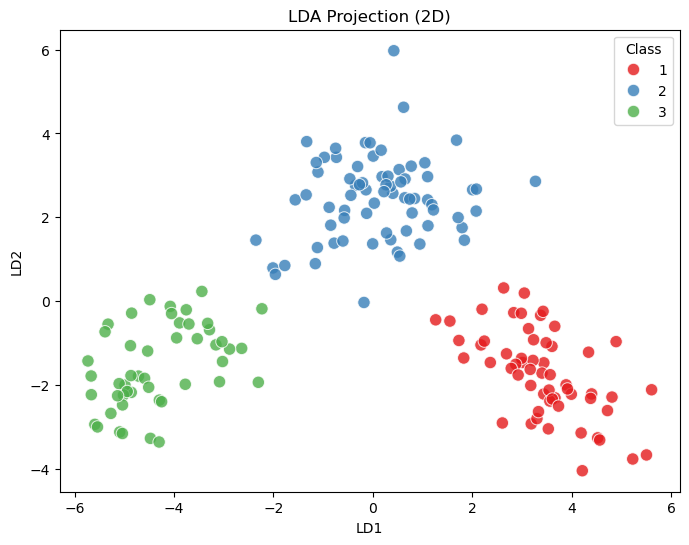

In [18]:

# LDA Projection (2D)
lda_viz = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda_viz.fit_transform(X_scaled, df["Class"])

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=df["Class"], palette="Set1", s=80, alpha=0.8)
plt.title("LDA Projection (2D)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title="Class")
plt.show()


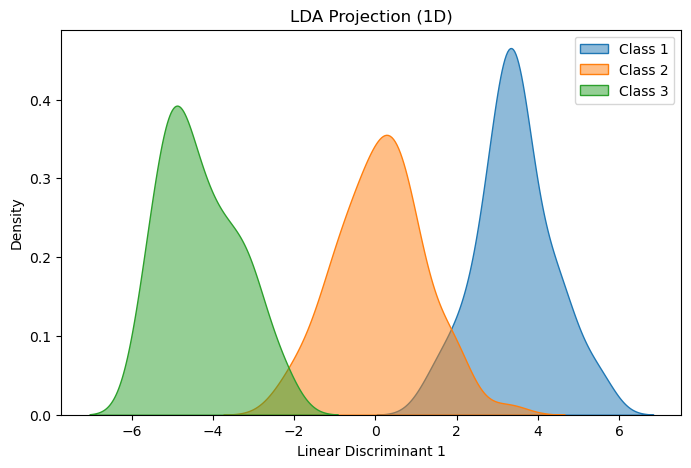

In [19]:

# LDA Projection (1D)
lda_1d = LinearDiscriminantAnalysis(n_components=1)
X_lda_1d = lda_1d.fit_transform(X_scaled, df["Class"])

plt.figure(figsize=(8,5))
for c in np.unique(df["Class"]):
    sns.kdeplot(X_lda_1d[df["Class"]==c, 0], label=f"Class {c}", fill=True, alpha=0.5)
plt.title("LDA Projection (1D)")
plt.xlabel("Linear Discriminant 1")
plt.legend()
plt.show()
